<a href="https://colab.research.google.com/github/adishourya/exAI/blob/farhang/LIM%26SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv("cleaned_cupid.csv",index_col=0)

In [ ]:
df['height'] = df['height'].replace('unspecified', pd.NA)
# Convert height to numeric, errors='coerce' will turn any non-numeric values into NaN
df['height'] = pd.to_numeric(df['height'], errors='coerce')

# Calculate median height excluding NaN
median_height = df['height'].median()

# Impute "unspecified" (now NaN) with the median height
df['height'].fillna(median_height, inplace=True)

In [ ]:
cols = list(df.columns)
cols.remove("age")
cols.remove("height")
cols

['status',
 'sex',
 'orientation',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'income',
 'job',
 'offspring',
 'pets',
 'religion',
 'smokes',
 'speaks',
 'preference']

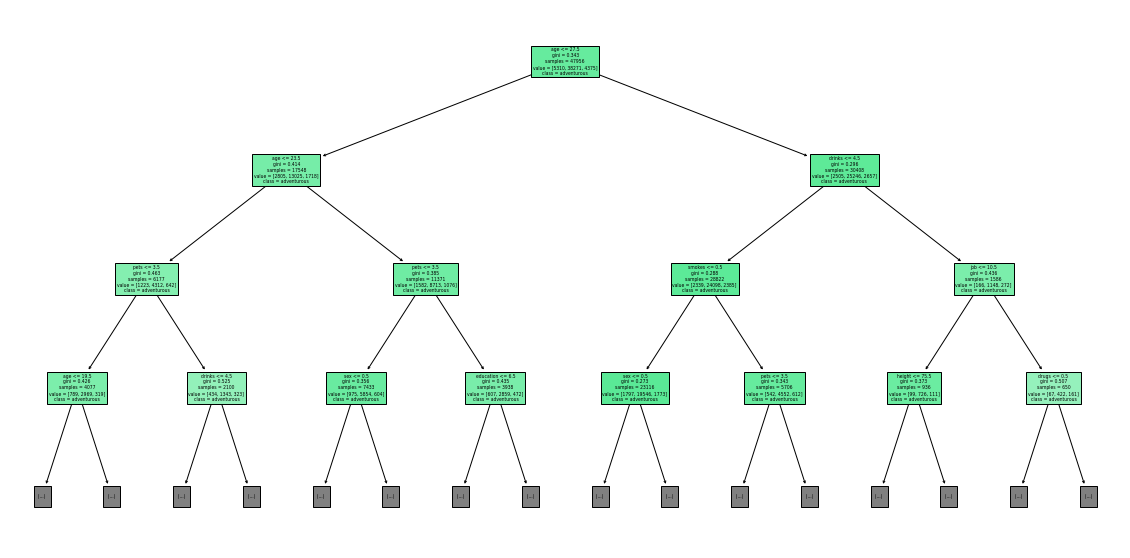

In [ ]:
# Drop the first unnamed column as it seems to be an index
# df = df.drop(columns=["Unnamed: 0"])

# Handle missing values by dropping them for simplicity (alternative approaches could involve imputation)
df_clean = df

# Encoding categorical variables
label_encoders = {}
for column in cols:
    if df_clean[column].dtype == object and column != 'preference':
        le = LabelEncoder()
        df_clean[column] = le.fit_transform(df_clean[column])
        label_encoders[column] = le

# Splitting data into independent (X) and dependent (y) variables
X = df_clean.drop('preference', axis=1)
y = df_clean['preference']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, max_depth=3)
plt.show()

In [ ]:
clf.feature_importances_

array([0.12624535, 0.01621108, 0.00551895, 0.0210862 , 0.06569673,
       0.04781624, 0.0463112 , 0.03721922, 0.06130667, 0.06493716,
       0.13539931, 0.02964609, 0.08713839, 0.05356694, 0.03896649,
       0.06549476, 0.03288658, 0.06455264])

In [ ]:
X.columns


Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'offspring', 'pets', 'religion', 'smokes', 'speaks'],
      dtype='object')

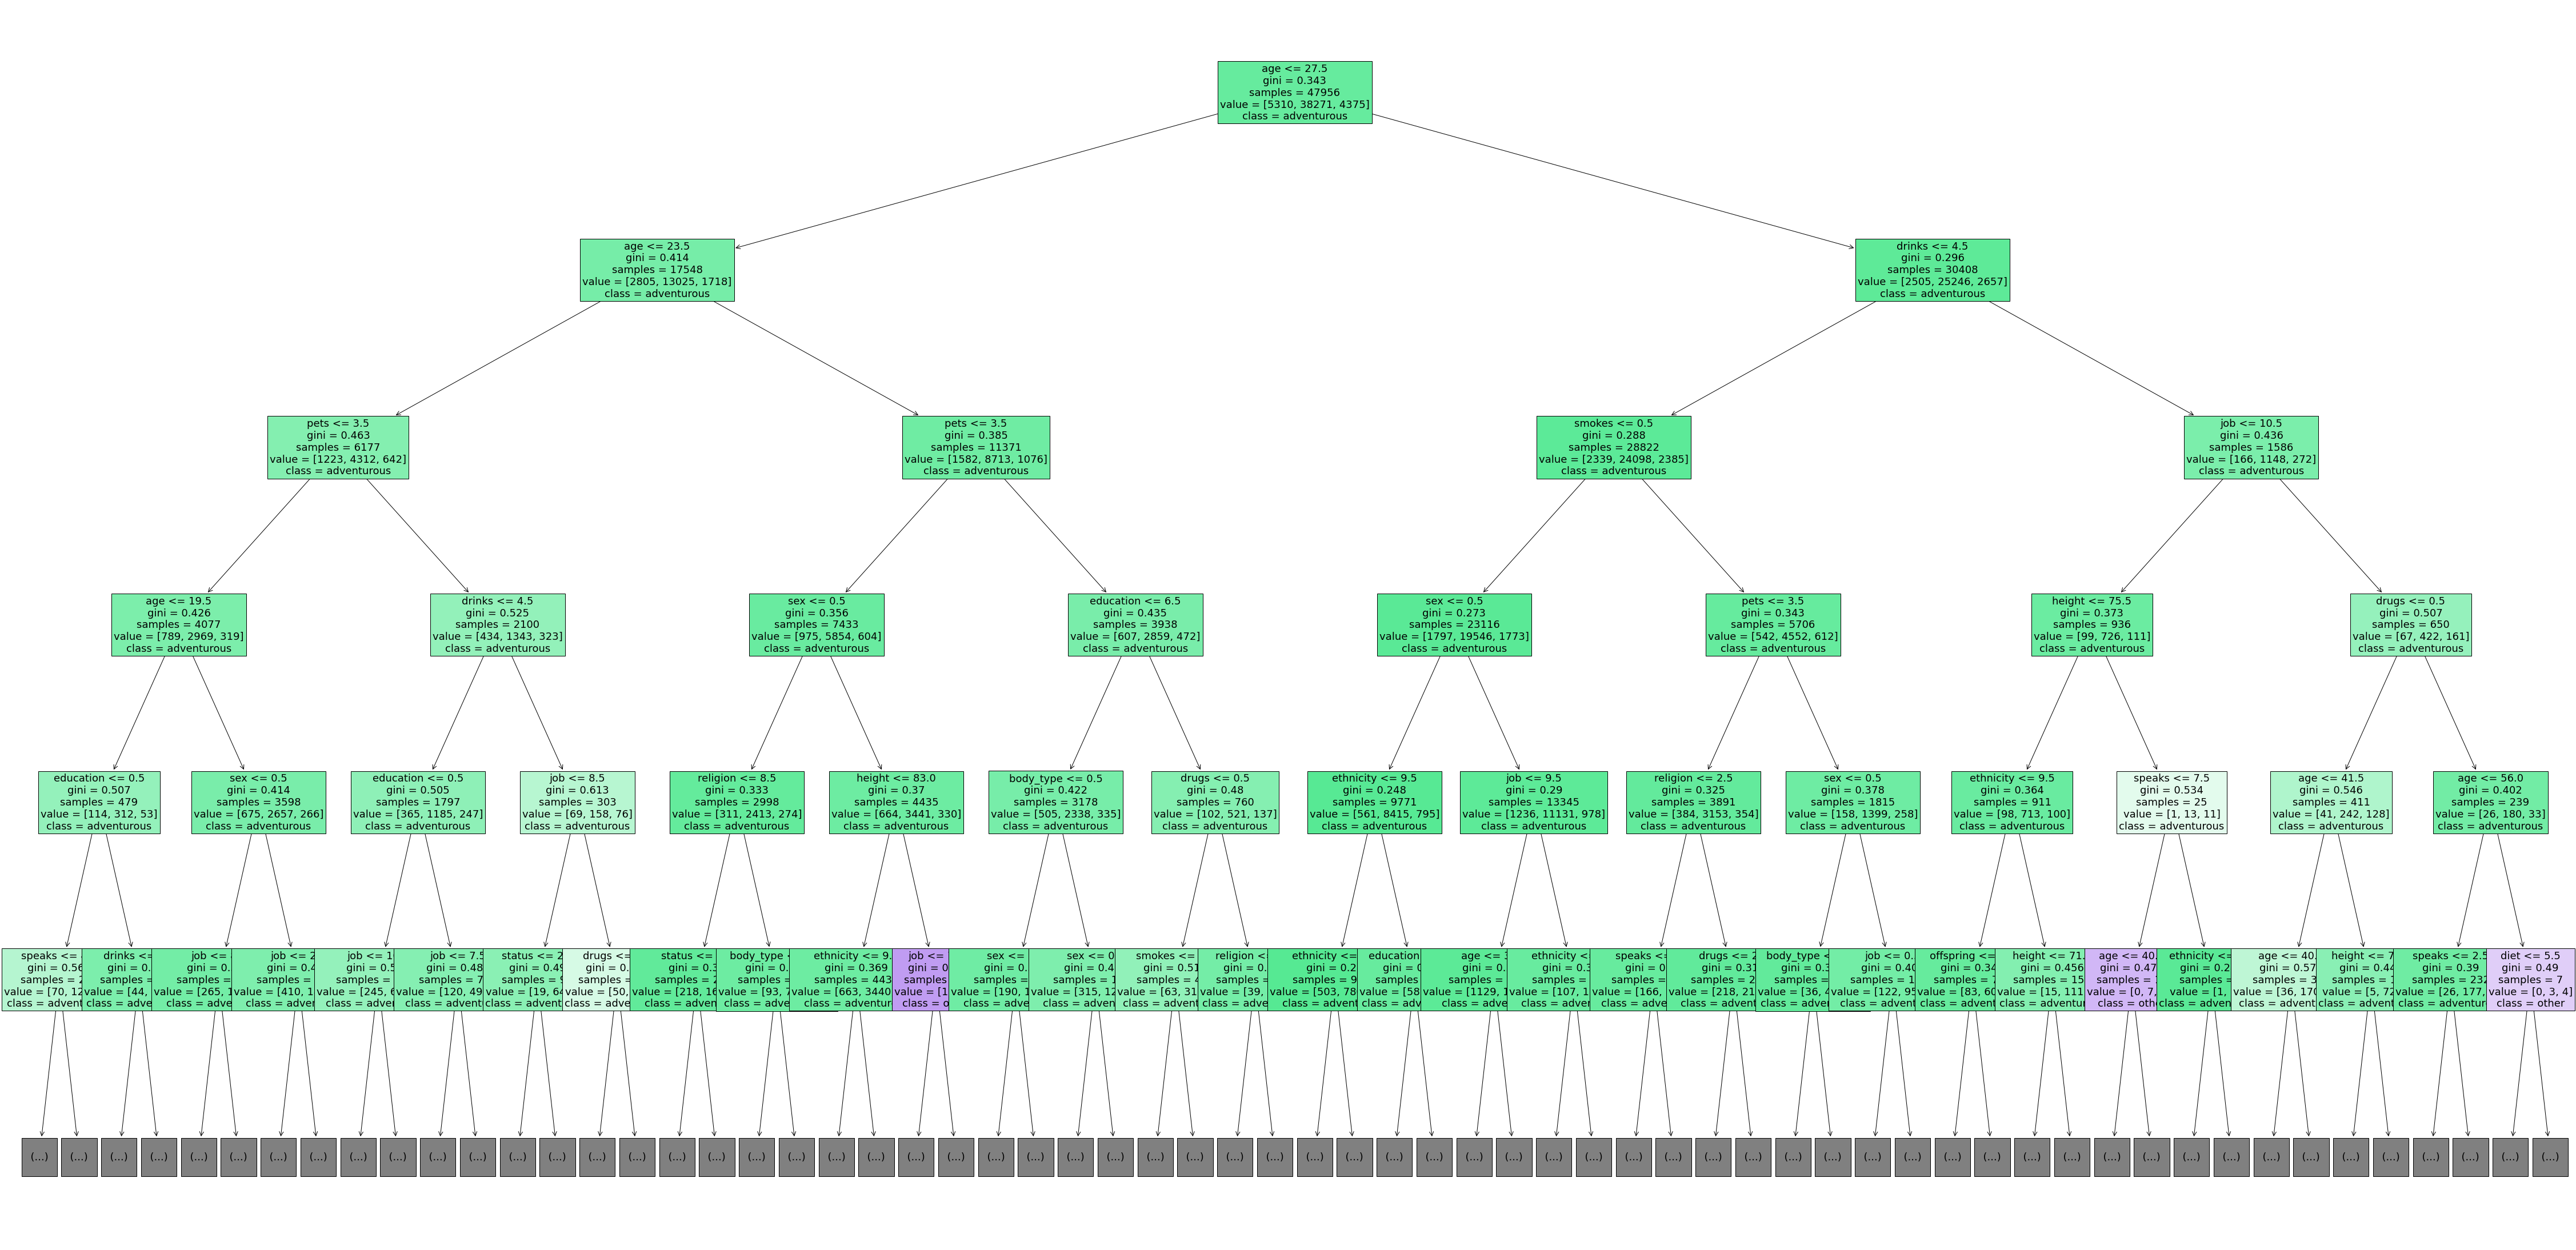

In [ ]:
# Plotting the Decision Tree
plt.figure(figsize=(80,40))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, max_depth=5,fontsize=18)
plt.show()

In [ ]:
import numpy as np
np.average(clf.predict(X_test) == y_test)

0.6387823185988324

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,clf.predict(X_test))

array([[ 209,  994,  148],
       [1181, 7304, 1041],
       [ 149,  818,  146]], dtype=int64)

In [ ]:
df["preference"].value_counts()

adventurous    47797
academic        6661
other           5488
Name: preference, dtype: int64

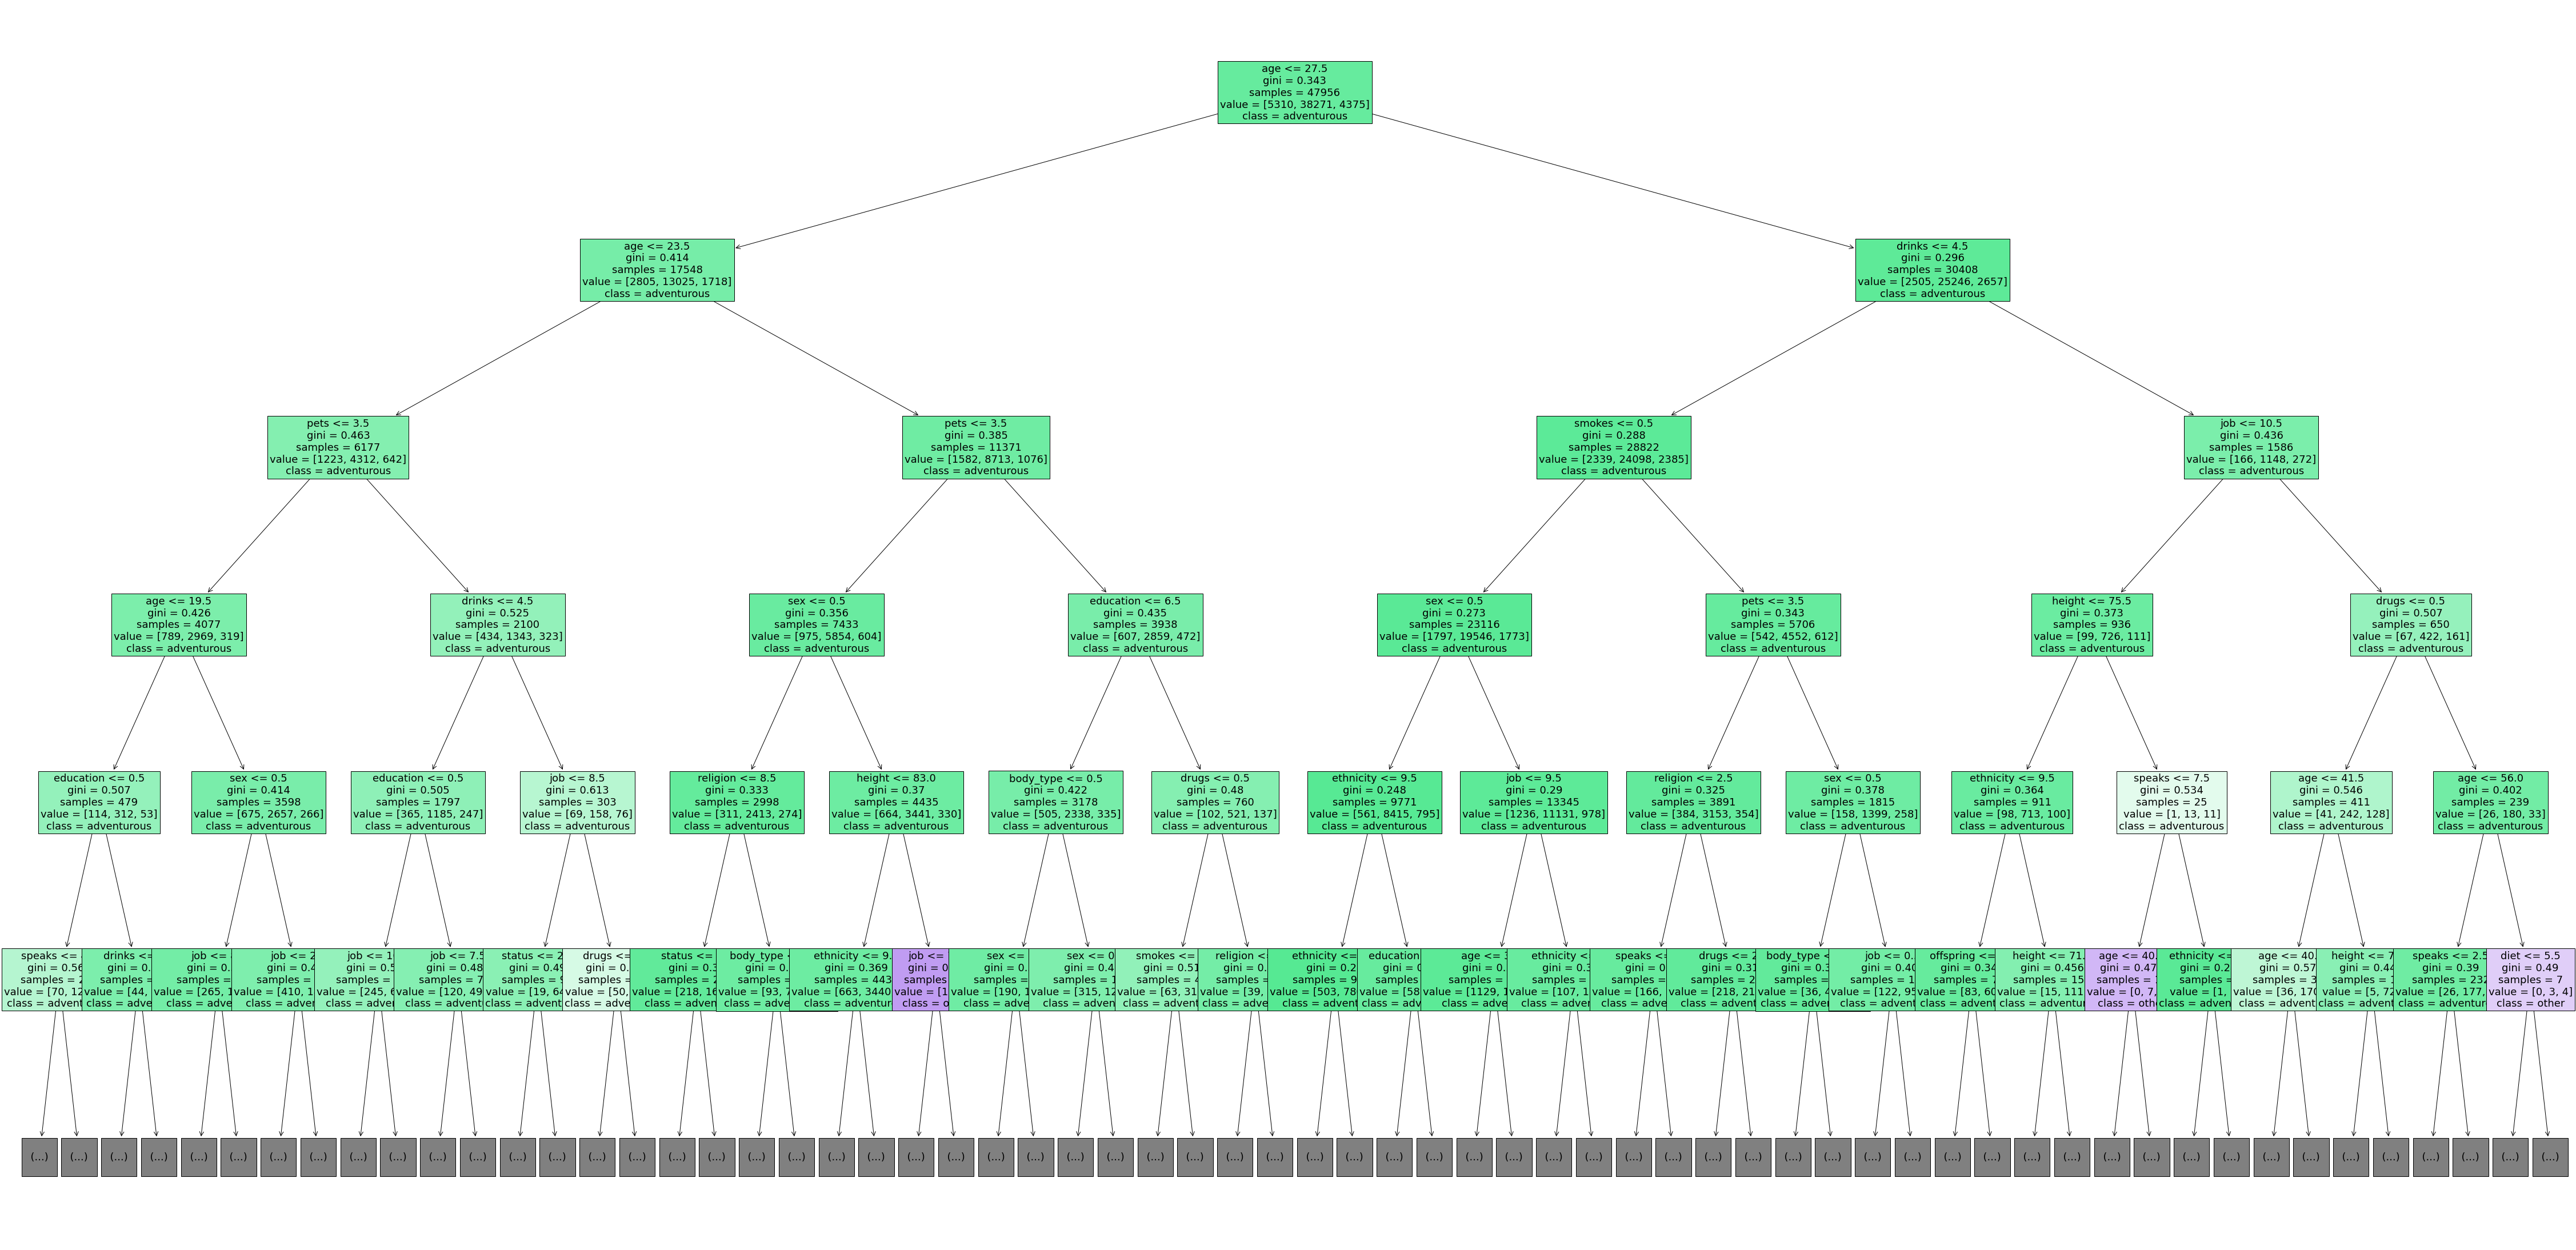

In [ ]:
# Plotting the Decision Tree
plt.figure(figsize=(80,40))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, max_depth=5,fontsize=18)
plt.show()

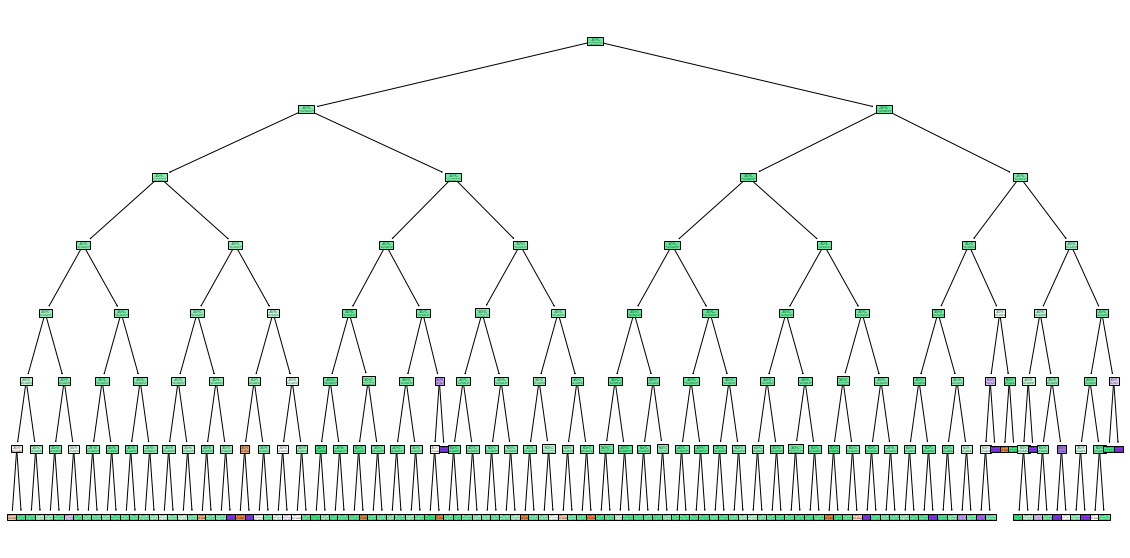

In [ ]:
# Training the Decision Tree Classifier
clf2 = DecisionTreeClassifier(random_state=42,max_depth=7)
clf2.fit(X_train, y_train)

# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf2, filled=True, feature_names=X.columns, class_names=clf2.classes_, max_depth=7)
plt.show()

In [ ]:
np.average(y_test==clf2.predict(X_test))


0.7930775646371977

In [ ]:
np.average(y_train==clf2.predict(X_train))


0.7995454166319126

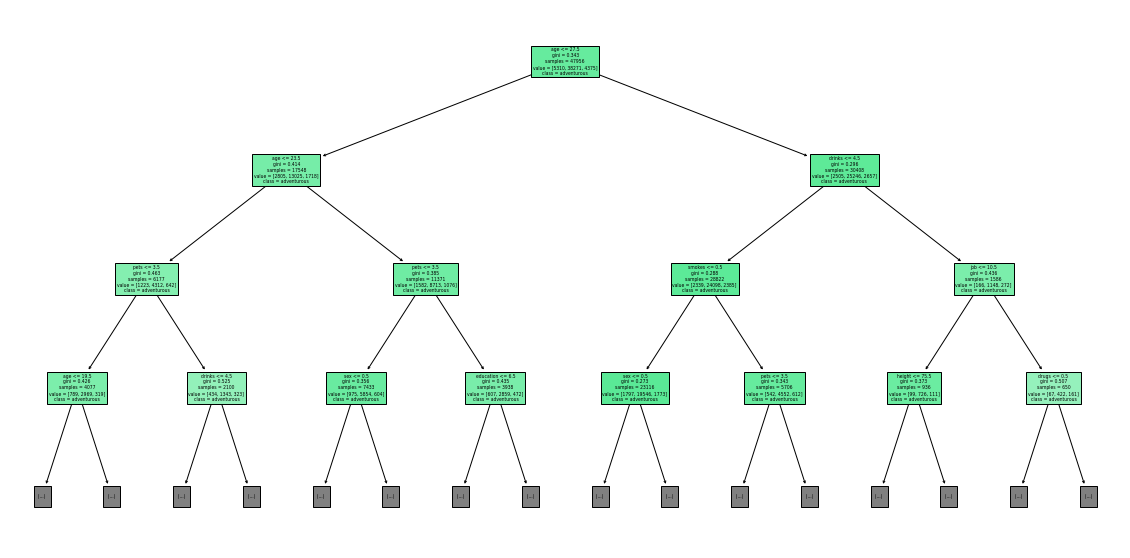

In [ ]:
# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf2, filled=True, feature_names=X.columns, class_names=clf2.classes_, max_depth=3)
plt.show()

In [ ]:
clf2.feature_importances_


array([0.3452252 , 0.01463889, 0.04628781, 0.00779259, 0.03512821,
       0.01307496, 0.08017546, 0.04840698, 0.03616668, 0.05650008,
       0.0492241 , 0.00851291, 0.08039335, 0.01795592, 0.06651878,
       0.01823634, 0.04085736, 0.03490437])

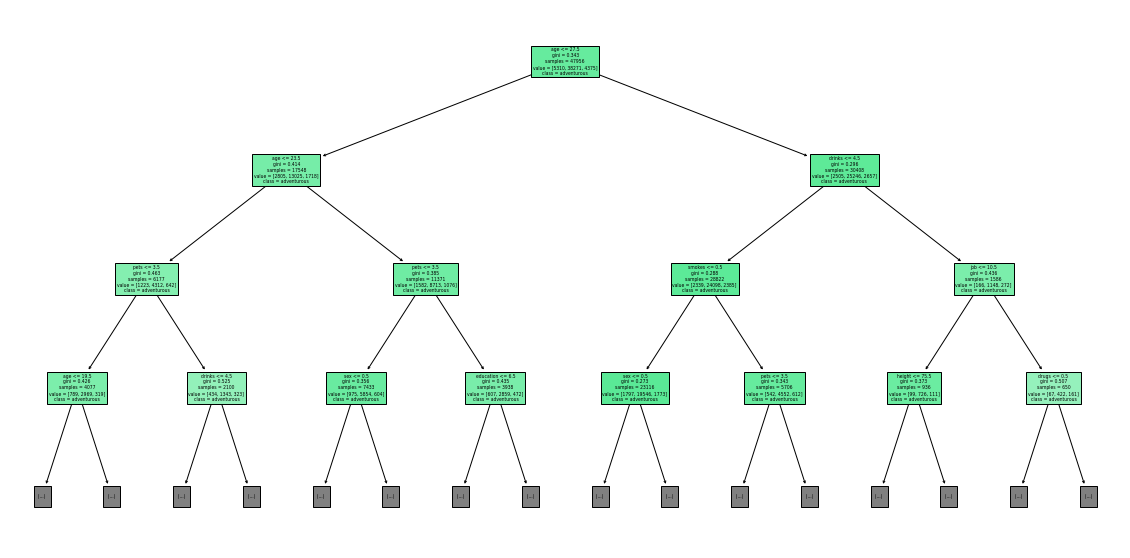

Accuracy: 0.6387823185988324


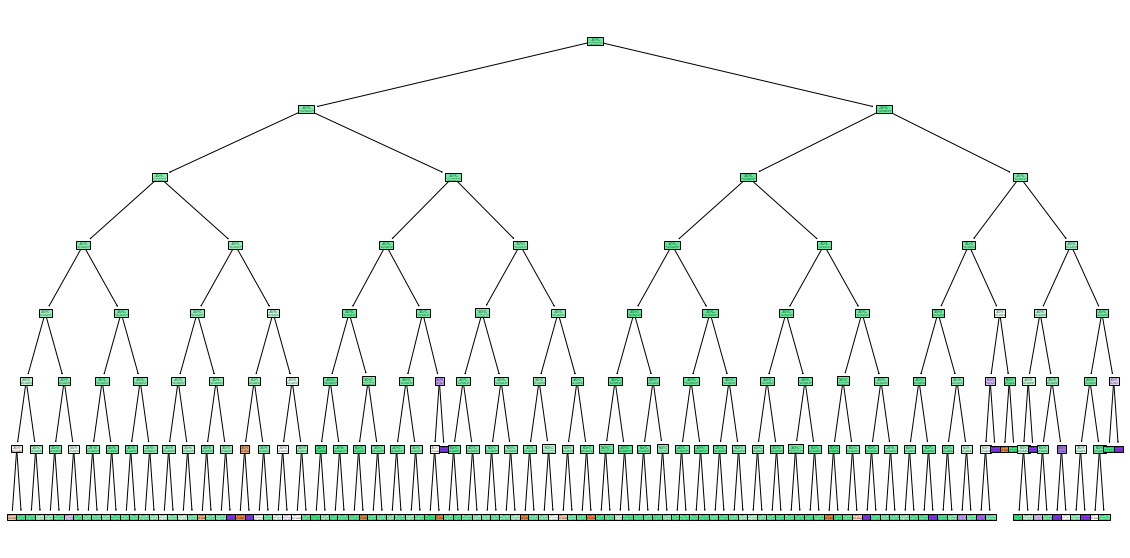

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("cleaned_cupid.csv", index_col=0)
df['height'] = pd.to_numeric(df['height'].replace('unspecified', pd.NA), errors='coerce').fillna(df['height'].median())

cols = [col for col in df.columns if col not in ["age", "height"]]
df_clean = df.copy()
label_encoders = {col: LabelEncoder().fit(df_clean[col]) for col in cols if df_clean[col].dtype == object and col != 'preference'}
for col, le in label_encoders.items():
    df_clean[col] = le.transform(df_clean[col])

X_train, X_test, y_train, y_test = train_test_split(df_clean.drop('preference', axis=1), df_clean['preference'], test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=clf.classes_, max_depth=3)
plt.show()

print(f"Accuracy: {clf.score(X_test, y_test)}")

plt.figure(figsize=(20, 10))
plot_tree(DecisionTreeClassifier(random_state=42, max_depth=7).fit(X_train, y_train), filled=True, feature_names=X_train.columns, class_names=clf.classes_, max_depth=7)
plt.show()


# lime

In [ ]:
import lime
import lime.lime_tabular
predict_fn = lambda x: clf.predict_proba(x).astype(float)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=clf.classes_, discretize_continuous=True)
instance_to_explain = X_test.iloc[0]
exp = explainer.explain_instance(instance_to_explain.values, predict_fn, num_features=len(X.columns))
exp.show_in_notebook(show_table=True)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.metrics import confusion_matrix
import lime
import lime.lime_tabular

df = pd.read_csv("cleaned_cupid.csv", index_col=0)

df['height'] = df['height'].replace('unspecified', pd.NA)
df['height'] = pd.to_numeric(df['height'], errors='coerce')
median_height = df['height'].median()
df['height'].fillna(median_height, inplace=True)

cols = list(df.columns)
cols.remove("age")
cols.remove("height")

df_clean = df

label_encoders = {}
for column in cols:
    if df_clean[column].dtype == object and column != 'preference':
        le = LabelEncoder()
        df_clean[column] = le.fit_transform(df_clean[column])
        label_encoders[column] = le

X = df_clean.drop('preference', axis=1)
y = df_clean['preference']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

predict_fn = lambda x: clf.predict_proba(x).astype(float)

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=clf.classes_, discretize_continuous=True)

instance_to_explain = X_test.iloc[0]

exp = explainer.explain_instance(instance_to_explain.values, predict_fn, num_features=len(X.columns))

exp.show_in_notebook(show_table=True)

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, max_depth=3)
plt.show()

print("Accuracy on test set:", np.average(clf.predict(X_test) == y_test))
print("Confusion matrix:")
print(confusion_matrix(y_test, clf.predict(X_test)))
print("Class distribution:")
print(df["preference"].value_counts())
print("Feature importances:", clf.feature_importances_)


Accuracy on test set: 0.6387823185988324
Confusion matrix:
[[ 209  994  148]
 [1181 7304 1041]
 [ 149  818  146]]
Class distribution:
adventurous    47797
academic        6661
other           5488
Name: preference, dtype: int64
Feature importances: [0.12624535 0.01621108 0.00551895 0.0210862  0.06569673 0.04781624
 0.0463112  0.03721922 0.06130667 0.06493716 0.13539931 0.02964609
 0.08713839 0.05356694 0.03896649 0.06549476 0.03288658 0.06455264]


# shap

 98%|===================| 35134/35970 [00:35<00:00]        

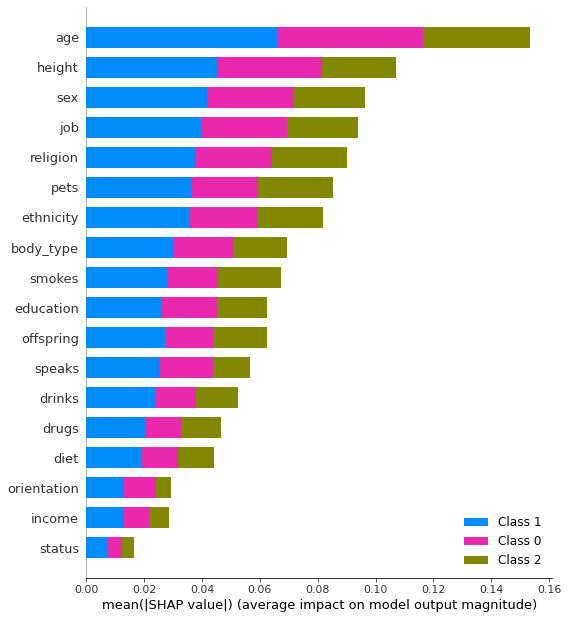

In [ ]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(clf, X_train)

# Calculate SHAP values for a sample of the test data
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Explain an individual prediction
sample_idx = 0  # Choose any index from the test data
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][sample_idx], X_test.iloc[sample_idx], feature_names=X.columns)


In [ ]:
import shap

# Create an explainer object
explainer = shap.TreeExplainer(clf)

# Choose a sample to explain
sample_idx = 0
sample = X_test.iloc[sample_idx]

# Calculate SHAP values
shap_values = explainer.shap_values(sample)

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], sample)

# Explaining the output of the model's prediction
print("Actual Label:", "Positive" if y_test.iloc[sample_idx] else "Negative", "Review:")
print(X_test.iloc[sample_idx])

# Retrieve feature names
feature_names = X_test.columns

# Display feature names and corresponding Shapley values
num_features_to_display = 10  # Choose the number of features to display
for idx in range(num_features_to_display):
    feature_name = feature_names[idx]
    shap_value = shap_values[0][idx]
    feature_value = sample[feature_name]

    print(f"Feature: {feature_name}, Value: {feature_value}, Shapley Value: {shap_value}")


Actual Label: Positive Review:
age            26.0
status          3.0
sex             1.0
orientation     2.0
body_type       1.0
diet            0.0
drinks          4.0
drugs           0.0
education       1.0
ethnicity       9.0
height         70.0
income          2.0
job             6.0
offspring       6.0
pets            4.0
religion        9.0
smokes          0.0
speaks          7.0
Name: 4800, dtype: float64
Feature: age, Value: 26.0, Shapley Value: -0.022750669511708156
Feature: status, Value: 3.0, Shapley Value: -0.00017899095089553047
Feature: sex, Value: 1.0, Shapley Value: 0.021353568205605734
Feature: orientation, Value: 2.0, Shapley Value: 0.0009575014611489411
Feature: body_type, Value: 1.0, Shapley Value: 0.015597102786485755
Feature: diet, Value: 0.0, Shapley Value: -0.002414086988417563
Feature: drinks, Value: 4.0, Shapley Value: -0.007486210617234395
Feature: drugs, Value: 0.0, Shapley Value: 0.002947520130965685
Feature: education, Value: 1.0, Shapley Value: 0.013185

 98%|===================| 35318/35970 [00:35<00:00]        

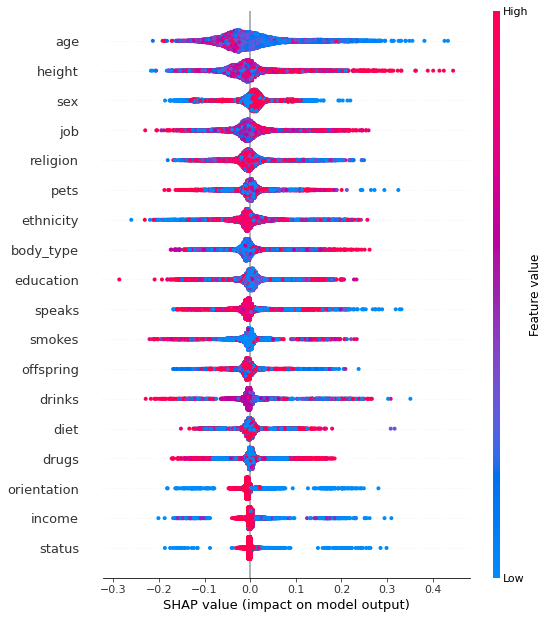

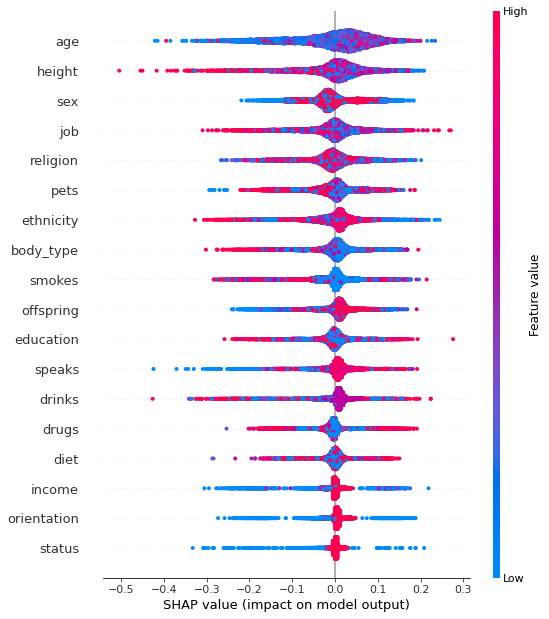

In [ ]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(clf, X_train)

# Calculate SHAP values for a sample of the test data
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP summary plot for the first class
shap.summary_plot(shap_values[0], X_test, feature_names=X.columns)

# Visualize the SHAP summary plot for the second class
shap.summary_plot(shap_values[1], X_test, feature_names=X.columns)

# Explain an individual prediction
sample_idx = 0  # Choose any index from the test data
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][sample_idx], X_test.iloc[sample_idx], feature_names=X.columns)


 97%|=================== | 34887/35970 [00:35<00:01]       

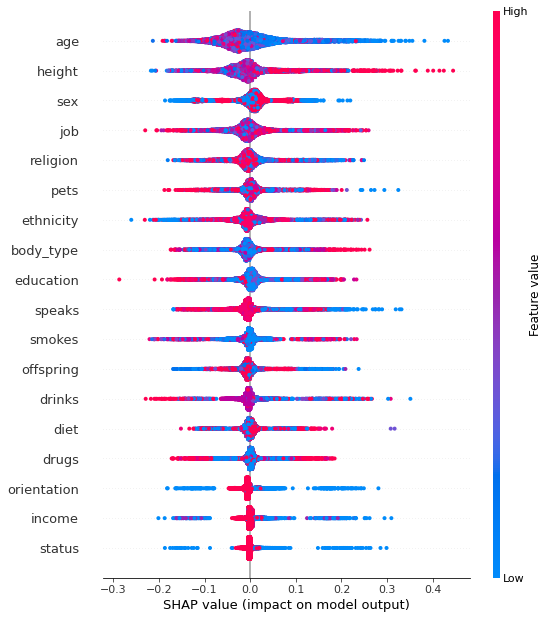

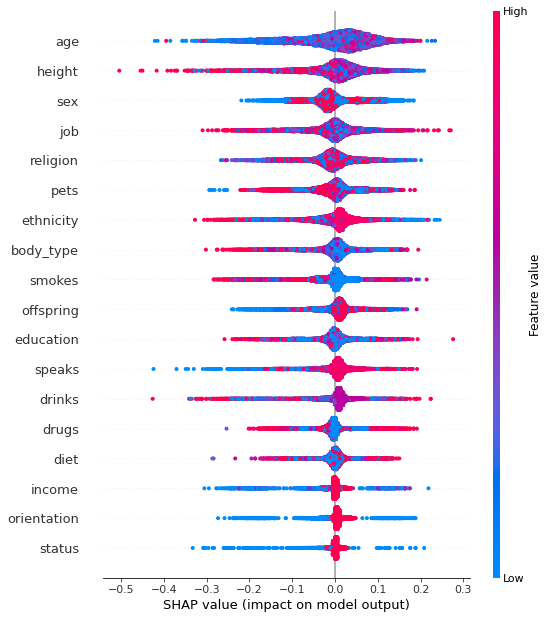

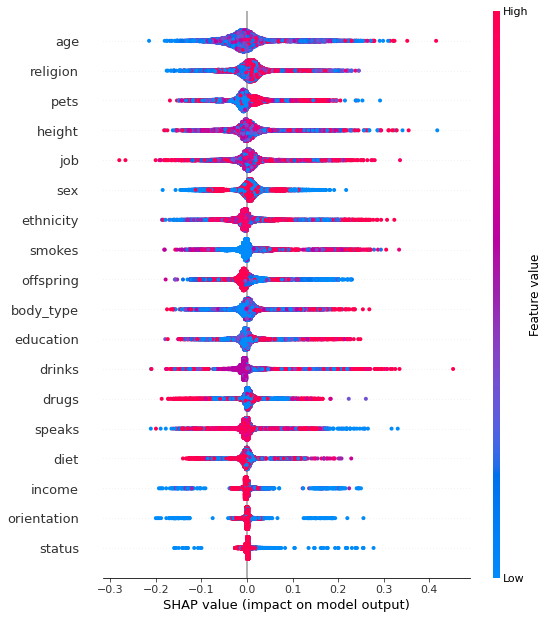

In [ ]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(clf, X_train)

# Calculate SHAP values for a sample of the test data
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP summary plots for each class
for class_index in range(3):
    shap.summary_plot(shap_values[class_index], X_test, feature_names=X.columns, class_names=clf.classes_)

# Explain an individual prediction
sample_idx = 0  # Choose any index from the test data
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][sample_idx], X_test.iloc[sample_idx], feature_names=X.columns)


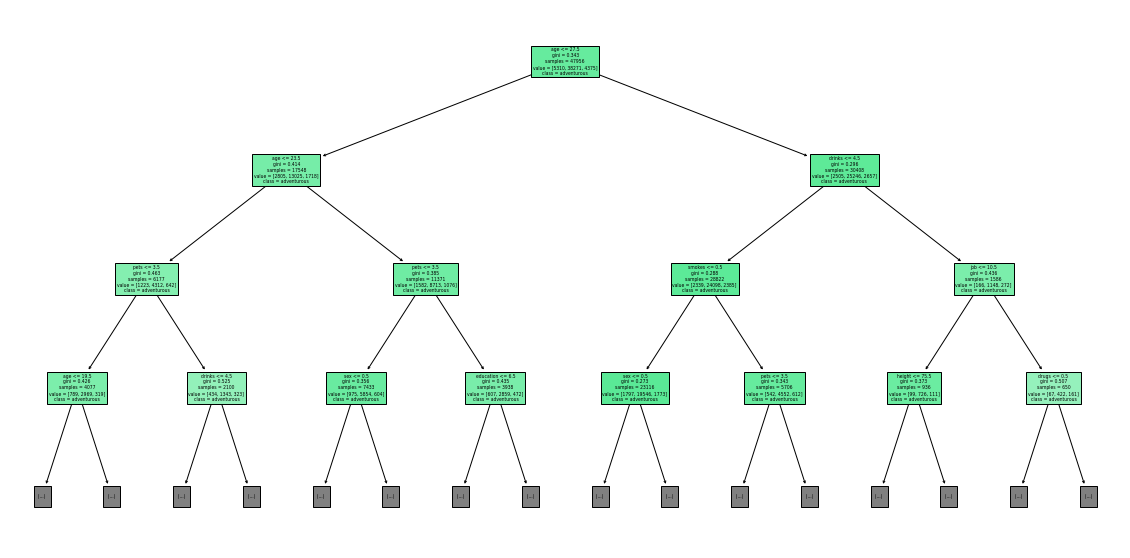

Test Accuracy: 0.7930775646371977
Train Accuracy: 0.7995454166319126
Feature Importances: [0.3452252  0.01463889 0.04628781 0.00779259 0.03512821 0.01307496
 0.08017546 0.04840698 0.03616668 0.05650008 0.0492241  0.00851291
 0.08039335 0.01795592 0.06651878 0.01823634 0.04085736 0.03490437]


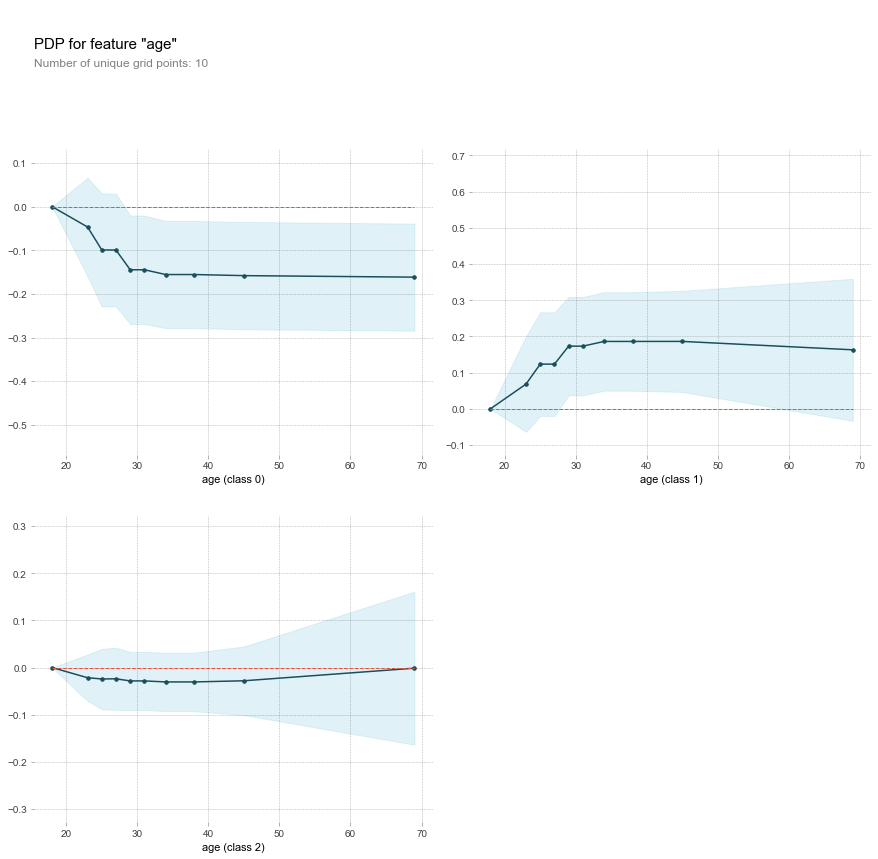

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from pdpbox import pdp

# Reading the dataset
df = pd.read_csv("cleaned_cupid.csv", index_col=0)

# Preprocessing
df['height'] = df['height'].replace('unspecified', pd.NA)
df['height'] = pd.to_numeric(df['height'], errors='coerce')
median_height = df['height'].median()
df['height'].fillna(median_height, inplace=True)

# Encoding categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == object and column != 'preference':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Splitting data into independent (X) and dependent (y) variables
X = df.drop('preference', axis=1)
y = df['preference']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Decision Tree Classifier
clf2 = DecisionTreeClassifier(random_state=42, max_depth=7)
clf2.fit(X_train, y_train)

# Define a function for plotting decision tree
def plot_decision_tree(clf, max_depth=None):
    plt.figure(figsize=(20, 10))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, max_depth=max_depth)
    plt.show()

# Plot the Decision Tree
plot_decision_tree(clf2, max_depth=3)

# Model Evaluation
test_accuracy = np.average(y_test == clf2.predict(X_test))
train_accuracy = np.average(y_train == clf2.predict(X_train))
print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)

# Plotting feature importances
feature_importances = clf2.feature_importances_
print("Feature Importances:", feature_importances)

# Partial Dependence Plots
# Calculate PDP for a specific feature
feature_to_plot = 'age'
pdp_age = pdp.pdp_isolate(model=clf2, dataset=X_test, model_features=X_test.columns, feature=feature_to_plot)

# Plot the PDP
pdp.pdp_plot(pdp_age, feature_to_plot)
plt.show()

# Calculate and plot PDP interactions between two features
#features_to_plot = ['age', 'height']
#interaction_pdp = pdp.pdp_interact(model=clf2, dataset=X_test, model_features=X_test.columns, features=features_to_plot)

# Plot the PDP interactions
#pdp.pdp_interact_plot(pdp_interact_out=interaction_pdp, feature_names=features_to_plot, plot_type='contour', plot_pdp=False, figsize=(10, 10))
#plt.gca().tick_params(labelsize=12)  # Set font size for contour labels
#plt.show()


